### P01: DABK Permission Registry
Task: Statistical DataSet Cleaning and Descriptive Analysis

### Unified registry of preparatory and construction work permissions and certify the commissioning of completed facilities.

Owner: State Architectural and Construction Inspectorate of Ukraine

Source: https://data.gov.ua/

In [1]:
#modules & library setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # for save/respawn point

In [2]:
# Load dataset
# Online version updated on a regular basis: Online updated on regular basis
# Backup: source_file = "https://drive.google.com/file/d/1lTiXkogOyhDRp8-yZpzg5lUDDeJOQH0z/view?usp=sharing"
# Local:  source_file = "input\dabk_data.csv"
source_file = "https://data.gov.ua/dataset/879552eb-b94a-4998-b16d-8f75321f4697/resource/f6b0a966-9a56-474c-9b04-3f250661afc0/download/data.csv"
df = pd.read_csv(source_file)

### Dataset Overview

In [3]:
df.head(3)

,id,EdrkoNo,Date03,org_name,RoomsAdd,RecDistrict,dk018code,square,k_pov,kadastr,...,avtsurname,avtcert,remreason,revedr,ExpOrg,ExpEDR,exp,expsert,zemldoc,ClassNaslidkiv
0,2492225,ДЦ 061200010001,2020-01-01,Департамент Державної архітектурно-будівельної...,6,"Житловий будинок, господарські будівлі та споруди",1110.4. Будинки дачні та садові,0.0,0,"1423984400:02:000:4404,",...,,NaN,Фізична особа,NaN,NaN,NaN,,NaN,договір купівлі-продажу,1
1,2492228,КД 061200020010,2020-01-02,Відділ державного архітектурно-будівельного ко...,6,Реконструкція житлового будинку з розширенням ...,1110.3. Будинки садибного типу,0.0,0,"3510300000:03:105:0004,",...,,NaN,Фізична особа,NaN,NaN,NaN,,NaN,договір сервітуту,1
2,2492231,КД 061200020016,2020-01-02,ВІдділ державного архітектурно-будівельного ко...,6,Реконструкція житлового будинку з розширенням ...,1110.3. Будинки садибного типу,0.0,0,"3510390400:57:000:0050,",...,,NaN,Фізична особа,NaN,NaN,NaN,,NaN,договір сервітуту,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45934 entries, 0 to 45933
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              45934 non-null  int64  
 1   EdrkoNo         45931 non-null  object 
 2   Date03          45934 non-null  object 
 3   org_name        27974 non-null  object 
 4   RoomsAdd        45934 non-null  int64  
 5   RecDistrict     45934 non-null  object 
 6   dk018code       45546 non-null  object 
 7   square          45934 non-null  float64
 8   k_pov           45934 non-null  int64  
 9   kadastr         45934 non-null  object 
 10  RegDistrict     42649 non-null  object 
 11  RegSity         42650 non-null  float64
 12  RegRedSt        45934 non-null  int64  
 13  RegStreet       42634 non-null  object 
 14  RegHome         42594 non-null  object 
 15  customer        45934 non-null  object 
 16  reccomit        9648 non-null   float64
 17  RemDecisNo      15618 non-null 

### Missing Data Lookup


<AxesSubplot:>

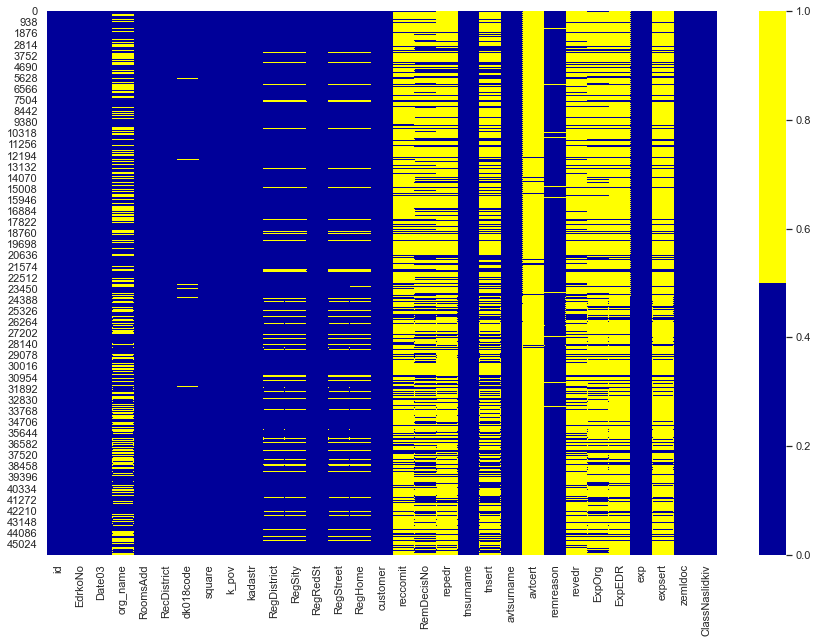

In [5]:
# Missing Data Heatmap
# We have not so many columns and can visualize missing data via heatmap

cols = df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.set(rc={'figure.figsize':(15, 10)})
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
# Missing Data Percentage List
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
EdrkoNo - 0.0%
Date03 - 0.0%
org_name - 39.0%
RoomsAdd - 0.0%
RecDistrict - 0.0%
dk018code - 1.0%
square - 0.0%
k_pov - 0.0%
kadastr - 0.0%
RegDistrict - 7.0%
RegSity - 7.0%
RegRedSt - 0.0%
RegStreet - 7.0%
RegHome - 7.0%
customer - 0.0%
reccomit - 79.0%
RemDecisNo - 66.0%
repedr - 78.0%
tnsurname - 0.0%
tnsert - 64.0%
avtsurname - 0.0%
avtcert - 98.0%
remreason - 2.0%
revedr - 82.0%
ExpOrg - 81.0%
ExpEDR - 84.0%
exp - 0.0%
expsert - 85.0%
zemldoc - 0.0%
ClassNaslidkiv - 0.0%


### Missing Data. Drop the Feature

In [7]:
# We can exlude(drop off) feature (column) with an extensive percentage of missing data
to_drop = ['reccomit', 'repedr', 'avtcert', 'revedr', 'ExpOrg', 'ExpEDR', 'expsert']
df.drop(to_drop, inplace=True, axis=1)

In [8]:
# After a brief analysis, we can exclude unneccesarry data: Local expert organization, name of expert etc. 
# Exclude organization inner number, identification and other inner info
to_drop = ['exp', 'remreason', 'tnsurname', 'tnsert', 'avtsurname', 'customer', 'RemDecisNo', 'org_name']
df.drop(to_drop, inplace=True, axis=1)

In [9]:
# We dont need exact adress (index, street and number) because, very often is missleading. The address can be both legal adress of business registration and a construction side
# But in both cases, they will be in one region and city.
to_drop = ['RegSity', 'RegStreet', 'RegHome', 'RegRedSt']
df.drop(to_drop, inplace=True, axis=1)

In [10]:
# Missing Data Percentage List
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
EdrkoNo - 0.0%
Date03 - 0.0%
RoomsAdd - 0.0%
RecDistrict - 0.0%
dk018code - 1.0%
square - 0.0%
k_pov - 0.0%
kadastr - 0.0%
RegDistrict - 7.0%
zemldoc - 0.0%
ClassNaslidkiv - 0.0%


In [11]:
# Missing Data Exact Count
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

EdrkoNo           3
dk018code       388
RegDistrict    3285
zemldoc          69
dtype: int64

In [12]:
# We can drop without hesitation observation with NaN data in 'EdrkoNo' (3 entries) and 'zemldoc' (69 entries) features.
df.dropna(subset=['EdrkoNo', 'zemldoc'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
# Missing Data Exact Count
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

dk018code       382
RegDistrict    3277
dtype: int64

In [14]:
df.head(2)

,id,EdrkoNo,Date03,RoomsAdd,RecDistrict,dk018code,square,k_pov,kadastr,RegDistrict,zemldoc,ClassNaslidkiv
0,2492225,ДЦ 061200010001,2020-01-01,6,"Житловий будинок, господарські будівлі та споруди",1110.4. Будинки дачні та садові,0.0,0,"1423984400:02:000:4404,","Донецька обл., Мангушський р-н, с. Білосарайсь...",договір купівлі-продажу,1
1,2492228,КД 061200020010,2020-01-02,6,Реконструкція житлового будинку з розширенням ...,1110.3. Будинки садибного типу,0.0,0,"3510300000:03:105:0004,","Кіровоградська обл., м. Олександрія",договір сервітуту,1


In [15]:
# Save Point
df.to_pickle("./dummy.pkl")

In [16]:
# Respawn 
df = pd.read_pickle("./dummy.pkl")

### Postponed task
1. Impute missing data in 'dk018code' by related data from 'RecDistric'
2. Impute missing data in 'RegDistrict' based on fist two character in 'EdrkoNo'



In [17]:
# Meanwhile, let's drop all observation with any missing values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
# Missing Data Exact Count
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

-----

### 1. Detail value decoding and explanation

In [19]:
# 'dk018code' is DK018 code from State classifier of buildings and structures.
# Code clarification     # - chapter
                         ## - section  
                         ### - group
                         #### - class
                         ####.# - sub-class
# We have 209 "unique" values. Lets split code number, down to 'chapter', 'section', 'group', and add description
df['dk018chapter']= df['dk018code'].str[:1].astype(int)
df['dk018chaptername'] = np.nan
df['dk018section']= df['dk018code'].str[:2].astype(int)
df['dk018sectionname'] = np.nan
df['dk018group']= df['dk018code'].str[:3].astype(int)
df['dk018groupname'] = np.nan

### Postponed task
3. Parse/Scrape webpage with detailed code description
https://zakon.rada.gov.ua/rada/show/ru/va507565-00/sp:wide#o1562

In [20]:
# Meanwhile, let's use "handmaded" dataset
df_DK018codes=pd.read_csv("input\DK018codes.csv")
df_DK018codes.head()

,Code,Info
0,1,БУДІВЛІ
1,11,Будівлі житлові
2,111,Будинки одноквартирні
3,112,Будинки з двома та більше квартирами
4,113,Гуртожитки


In [21]:
# Fill the data
for key, value in zip(df_DK018codes.Code,df_DK018codes.Info):
    df.at[df.index[df['dk018chapter'] == key], 'dk018chaptername'] = value
    df.at[df.index[df['dk018section'] == key], 'dk018sectionname'] = value
    df.at[df.index[df['dk018group'] == key], 'dk018groupname'] = value

In [22]:
# Check results. look at dk018 columns only
dk_cols = [col for col in df.columns if 'dk018' in col]
df[dk_cols]

,dk018code,dk018chapter,dk018chaptername,dk018section,dk018sectionname,dk018group,dk018groupname
0,1110.4. Будинки дачні та садові,1,БУДІВЛІ,11,Будівлі житлові,111,Будинки одноквартирні
1,1110.3. Будинки садибного типу,1,БУДІВЛІ,11,Будівлі житлові,111,Будинки одноквартирні
2,1110.3. Будинки садибного типу,1,БУДІВЛІ,11,Будівлі житлові,111,Будинки одноквартирні
3,1110.3. Будинки садибного типу,1,БУДІВЛІ,11,Будівлі житлові,111,Будинки одноквартирні
4,1110.3. Будинки садибного типу,1,БУДІВЛІ,11,Будівлі житлові,111,Будинки одноквартирні
...,...,...,...,...,...,...,...
42198,1122.2. Будинки багатоквартирні підвищеної ком...,1,БУДІВЛІ,11,Будівлі житлові,112,Будинки з двома та більше квартирами
42199,1110.4. Будинки дачні та садові,1,БУДІВЛІ,11,Будівлі житлові,111,Будинки одноквартирні
42200,1110.4. Будинки дачні та садові,1,БУДІВЛІ,11,Будівлі житлові,111,Будинки одноквартирні
42201,1110.4. Будинки дачні та садові,1,БУДІВЛІ,11,Будівлі житлові,111,Будинки одноквартирні


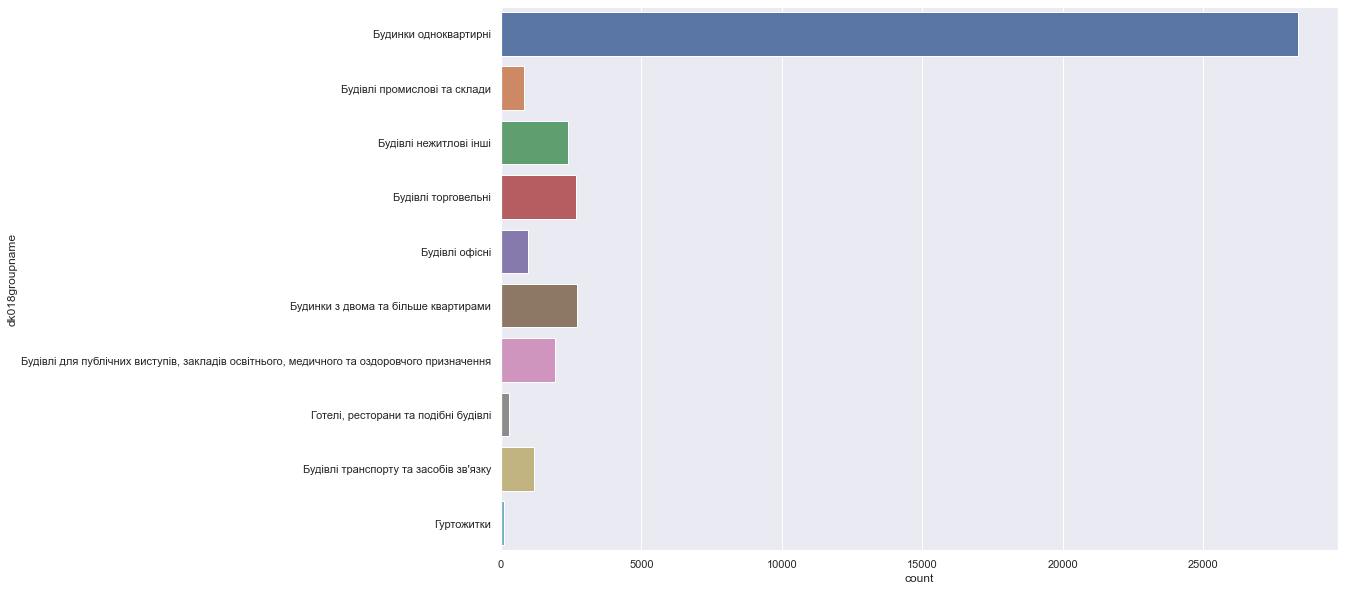

In [23]:
# Data is ready for further Data Analysis
# E.g. Only "БУДІВЛІ"(Buildings) sample
ax = sns.countplot(y="dk018groupname", data=df[df['dk018chapter'] == 1])

-----

### 2. Ordering of geo data

In [24]:
df.RegDistrict.value_counts()

Харківська обл., м. Харків                           710
Дніпропетровська обл., м. Дніпро                     695
Хмельницька обл., м. Хмельницький                    474
Вінницька обл., м. Вінниця                           391
Київська обл., м. Ірпінь                             375
                                                    ... 
Полтавська обл., Диканський р-н, с. Ландарі            1
Львівська обл., Стрийський р-н, с. Гайдучина           1
Донецька обл., Добропільський р-н, с. Никанорівка      1
Сумська обл., Сумський р-н, с. Кровне                  1
Одеська обл., Роздільнянський р-н, с. Степове          1
Name: RegDistrict, Length: 6979, dtype: int64

In [25]:
# Simple split returns many incorrect options due to initial data of different formatting.
df_geo = df['RegDistrict'].str.split(",", expand=True)
df_geo

,0,1,2,3,4
0,Донецька обл.,Мангушський р-н,с. Білосарайська Коса,None,None
1,Кіровоградська обл.,м. Олександрія,None,None,None
2,Кіровоградська обл.,м. Олександрія,с. Марто-Іванівка,None,None
3,Київська обл.,м. Обухів,None,None,None
4,Закарпатська обл.,м. Ужгород,None,None,None
...,...,...,...,...,...
42198,м.Київ,Печерський,None,None,None
42199,Київська обл.,Бориспільський р-н,с. Глибоке,None,None
42200,Київська обл.,Бориспільський р-н,с. Глибоке,None,None
42201,Київська обл.,Бориспільський р-н,с. Глибоке,None,None


### Postponed task
4. Split string value: looking for marker 'обл' and then moving backwards to the start looking for first appeared uppercase latter. Then cut-out a found value.


5. (alt. solution) We can use an administrative dataset of regions and cities names. Look for similarity and set a new clear value from that dataset into the main one.  Класифікатор об’єктів адміністративно-територіального устрою України (КОАТУУ)
https://data.gov.ua/dataset/dc081fb0-f504-4696-916c-a5b24312ab6e/resource/296adb7a-476a-40c8-9de6-211327cb3aa1?view_id=d8e343f9-c85e-4cb6-9ac2-ca96b82f0450


#### Work in Progress

In [26]:
counter = 1
for x in df['RegDistrict']:
    # Test on first 10 rows
    counter += 1
    if counter > 10: break 
      
    print(x)
    
    # looking for "обл." this is abreviation for word 'область'(region)
    marker = 'обл.'
    y = x.index(marker)   
    print(y)        

Донецька обл., Мангушський р-н, с. Білосарайська Коса
9
Кіровоградська обл., м. Олександрія
15
Кіровоградська обл., м. Олександрія, с. Марто-Іванівка
15
Київська обл., м. Обухів
9
Закарпатська обл., м. Ужгород
13
Дніпропетровська обл., м. Дніпро
17
Одеська обл., м. Білгород-Дністровський, смт Затока
8
Кіровоградська обл., Знам'янський р-н, с. Богданівка
15
Кіровоградська обл., м. Знам'янка
15


-----

### 3. Dimensionality Reduction. (in progress) 


In [27]:
# 'dk018code' is DK018 code from State classifier of buildings and structures. and we have 1.0% of missing values
df.RecDistrict.value_counts()

Будівництво індивідуального житлового будинку                                                                               1637
Будівництво житлового будинку                                                                                               1164
Індивідуальний житловий будинок                                                                                             1116
Реконструкція житлового будинку                                                                                              565
Житловий будинок                                                                                                             546
                                                                                                                            ... 
Нове будівництво дачного будинку та господарської будівлі                                                                      1
Реконструкція квартири № 55 з розподілом на дві окремі квартири в житловому будинку              

### Postponed task

1. Many of individual, rare data similar to more frequent data, basically the same with an error or mistyped. We can use some algorithms to find similarities and add small rare data towards a big one.

In [28]:
# Meanwhile, let`s drop observation with low frequency, say less than 10
# df = df[df.groupby('RecDistrict')['RecDistrict'].transform('count').ge(10)]
# df.RecDistrict.value_counts()

In [29]:
# As results, unique values count drops from 20770 down to 252, 
# but observation count drops from 46K down to 17K. Need another solution

---

### Export 

In [30]:
# DataSet ready for export and further Data Analysis
df.to_csv('output\DABK_reg.csv', index=False, encoding='utf-8')